In [1]:
'''BASIC'''
import numpy as np
import pandas as pd
import random as rand
import datetime
import math
import os
import itertools as itr
import warnings
warnings.simplefilter('ignore')
'''PLOT'''
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')
font = {'size':16}
'''STATS'''
import scipy.stats as scs
import statsmodels.api as sm
'''SCIKIT LEARN'''
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, r2_score, mean_squared_error, classification_report, make_scorer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

'''RETURN'''
os.system("say 'loading complete' &");

In [2]:
df = pd.read_csv('data/churn_train.csv')
df.head(1)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.0,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0


In [3]:
df['date2'] = pd.to_datetime(df['last_trip_date'])
date_cutoff = df['date2'].max() - datetime.timedelta(30, 0, 0)
df['churn'] = (df['date2'] < date_cutoff).astype('int')

In [4]:
df.groupby('city')['churn'].mean()

city
Astapor           0.745165
King's Landing    0.372176
Winterfell        0.648443
Name: churn, dtype: float64

In [5]:
df['city'].value_counts(normalize=True).reset_index()

,index,city
0,Winterfell,0.4655
1,Astapor,0.3309
2,King's Landing,0.2036


In [6]:
# Create dummies indicating whether ratings by driver or ratings of driver are NA.

df['rating_by_driver_missing'] = (df['avg_rating_by_driver'].isnull())
df['rating_of_driver_missing'] = (df['avg_rating_of_driver'].isnull())

# chi-square test
crosstab = pd.crosstab(df['rating_of_driver_missing'], df['churn'])
crosstab

scs.chi2_contingency(crosstab)

# T-test for independence
scs.ttest_ind(df['churn'][df['avg_rating_of_driver'].isnull()],
              df['churn'][~df['avg_rating_of_driver'].isnull()] )



churn,0,1
rating_of_driver_missing,,
False,13701,19771
True,1331,5197


(981.9478592490501,
 1.5072534798757248e-215,
 1,
 array([[12578.7776, 20893.2224],
        [ 2453.2224,  4074.7776]]))

Ttest_indResult(statistic=31.74161159277184, pvalue=2.1529523725275466e-218)

In [7]:
# chi-square test
crosstab2 = pd.crosstab(df['rating_by_driver_missing'], df['churn'],margins=True)
crosstab2

scs.chi2_contingency(crosstab2)

scs.ttest_ind(df['churn'][df['avg_rating_by_driver'].isnull()],
              df['churn'][~df['avg_rating_by_driver'].isnull()] )



churn,0,1,All
rating_by_driver_missing,,,
False,15000,24838,39838
True,32,130,162
All,15032,24968,40000


(22.03683687249295,
 0.00019706477158783483,
 4,
 array([[14971.1204, 24866.8796, 39838.    ],
        [   60.8796,   101.1204,   162.    ],
        [15032.    , 24968.    , 40000.    ]]))

Ttest_indResult(statistic=4.695517188760248, pvalue=2.6681421801975688e-06)

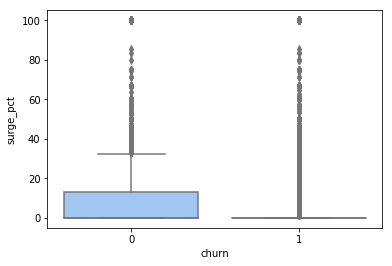

In [8]:
sns.boxplot(df['churn'], df['surge_pct'])

In [9]:
df['churn'].value_counts(normalize=True)

1    0.6242
0    0.3758
Name: churn, dtype: float64

In [10]:
df.phone.value_counts()

iPhone     27628
Android    12053
Name: phone, dtype: int64

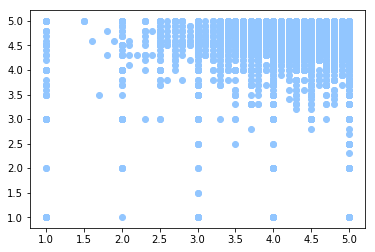

In [11]:
plt.scatter(df['avg_rating_of_driver'], df['avg_rating_by_driver']);

In [12]:
df.isnull().sum()/df.shape[0]

avg_dist                    0.000000
avg_rating_by_driver        0.004050
avg_rating_of_driver        0.163200
avg_surge                   0.000000
city                        0.000000
last_trip_date              0.000000
phone                       0.007975
signup_date                 0.000000
surge_pct                   0.000000
trips_in_first_30_days      0.000000
luxury_car_user             0.000000
weekday_pct                 0.000000
date2                       0.000000
churn                       0.000000
rating_by_driver_missing    0.000000
rating_of_driver_missing    0.000000
dtype: float64

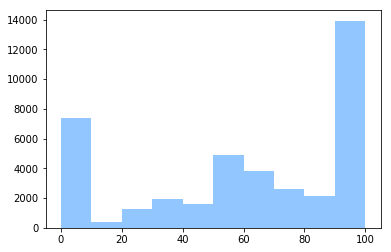

In [13]:
plt.hist(df['weekday_pct']);

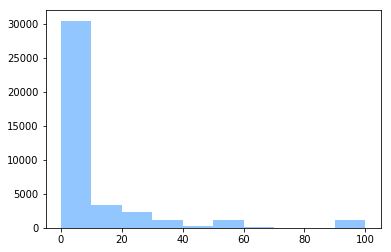

In [14]:
plt.hist(df['surge_pct']);